<a href="https://colab.research.google.com/github/valeriaciampa/project.data/blob/main/Tensorflow2_prjct_finale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf


In [2]:
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [3]:
#Importo Seaborn per il dataset e la visualizzazione dei dati che semplifica la creazione di grafici, ma anche la libreria matplotlib per grafici e figure
import seaborn as sns
import matplotlib.pyplot as plt

#pandas lo utilizzerò per la manipolazione e analisi dei dati, e la libreria specifica labelencoder di scikit learn per codificare le vars categoriali in variabili numeriche
import pandas as pd
from sklearn.preprocessing import LabelEncoder



In [4]:
#numpy mi permette di lavorare con array e funzioni matematiche
import numpy as np

#importo inoltre metriche di valutazione per i modelli di classificazione da Scikit-learn: la matrice di confusione, il report di classificazione e la misura di accuratezza.
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [5]:
#importo il dataset su cui lavorare da Seaborn che include dati su pinguini di 3 specie diverse con diverse caratteristiche come lunghezza e profondità del becco, pinne, ecc...
data = sns.load_dataset ("penguins")

Di seguito per analizzare la struttura del dataset, richiamo diversi comandi per visualizzare i primi 5 e ultimi 5 record, e rimuovo con .dropna eventuali valori mancanti per evitare distorsioni nell'allenamento dell'algoritmo di classificazione.

In [6]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
data.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [8]:
data.dropna(inplace=True)

In [9]:
data.describe() #richiedo le statistiche descrittive come indici di tendenza centrale, e dispersione dei dati, percentili, valori min e max per comprendere la distribuzione dei dati

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [10]:
data.info() #per avere un riassunto informativo del dataset e la tipologia di dati presenti


<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [11]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns #seleziono tutte le colonne del dataset che contengono dati categoriali (di tipo 'object') e ne ottengo i nomi. Questo è utile per isolare le variabili categoriali per successive operazioni di encoding o analisi.

Di seguito in questo blocco di codice creo dei grafici a barre per ciascuna colonna categoriale nel dataset, mostrando la distribuzione delle osservazioni per ogni categoria. Questo tipo di grafico è utile per analizzare la frequenza delle diverse categorie nelle variabili categoriali e identificare potenziali sbilanciamenti nei dati

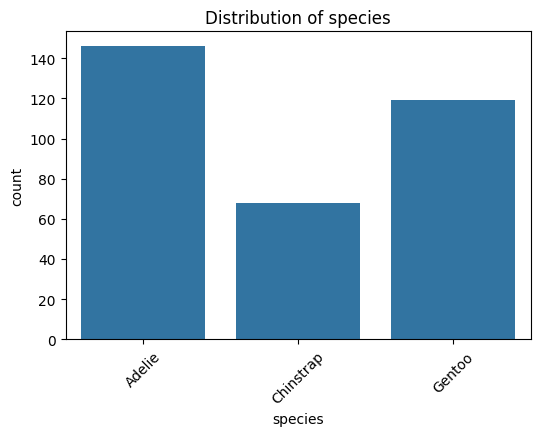

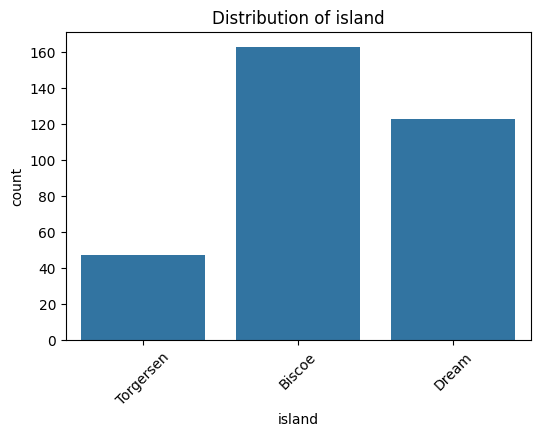

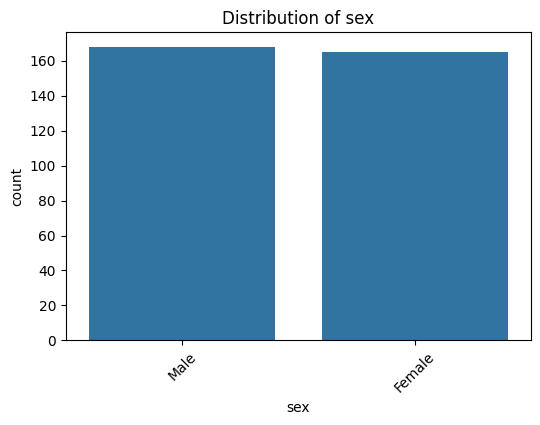

In [12]:
for col in categorical_cols:
  plt.figure(figsize =(6,4))
  sns.countplot(data=data, x=col)
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=45)
  plt.show()

In [13]:
numeric_features = data.select_dtypes(include=['float64','int']).columns.difference(['species']) #seleziono tutte le colonne con dati numerici (nel mio caso float64), escludendo la colonna 'species', e salvo i loro nomi in 'numeric_features'.

Di seguito nel prossimo blocco genero dei boxplot per ciascuna delle variabili numeriche nel dataset, suddividendo i dati in base alla "species" dei pinguini. I boxplot sono utili per visualizzare la distribuzione, la mediana, i quartili e potenziali outlier delle vaeriabili numeriche per ogni specie ee per confrontare le distribuzioni tra i gruppi categoriali delle specie dei pinguini.

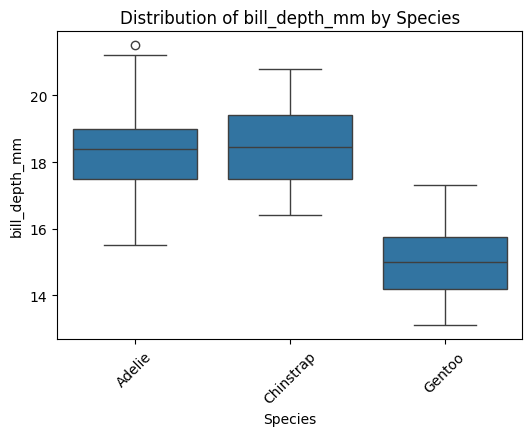

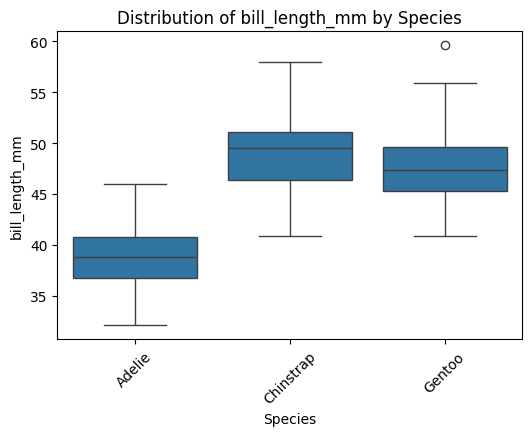

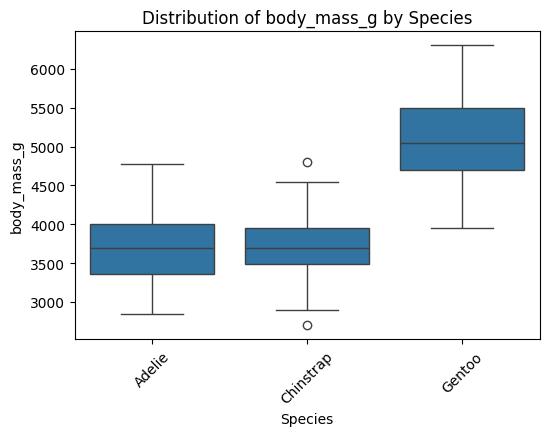

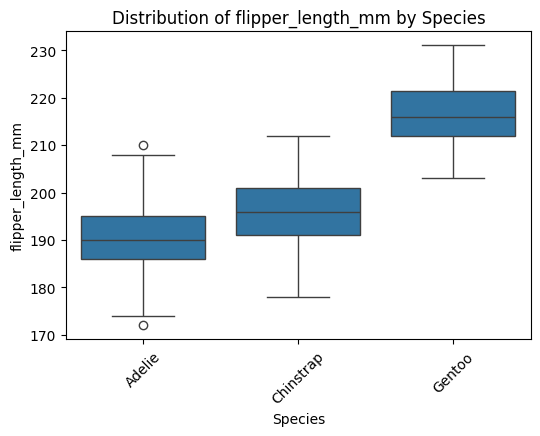

In [14]:
for feature in numeric_features:
  plt.figure(figsize=(6,4))
  sns.boxplot(x='species', y=feature, data=data)
  plt.title(f'Distribution of {feature} by Species')
  plt.xlabel('Species')
  plt.ylabel(feature)
  plt.xticks(rotation=45)
  plt.show()

Nel successivo passaggio, utilizzo LabelEncoder per convertire le colonne categoriali "species", "island" e "sex" in numeri, rendendo i dati categoriali pronti per l'uso in algoritmi di machine learning, che generalmente richiedono input numerici. Creo poi dei dizionari di mapping per tenere traccia delle conversioni, così da poter risalire ai valori originali, se necessario.

In [15]:
#Ricodifico le variabili categoriali da etichette in numeri per analizzare i dati
species_encoder =LabelEncoder()
island_encoder = LabelEncoder()
sex_encoder = LabelEncoder()

#Applico il LabelEncoder alle colonne specificate per convertire le etichette in valori numerici
data['species'] = species_encoder.fit_transform(data['species'])
data['island'] = island_encoder.fit_transform(data['island'])
data['sex'] = sex_encoder.fit_transform(data['sex'])

#creo dei dizionari per "mappare" le classi originali con i numeri assegnati nella ricodifica di labelencoder
species_mapping = dict(zip(species_encoder.classes_, range(len(species_encoder.classes_))))
island_mapping = dict(zip(island_encoder.classes_, range(len(island_encoder.classes_))))
sex_mapping = dict(zip(sex_encoder.classes_, range(len(sex_encoder.classes_))))


Nel seguente blocco importerò Keras per costruire e addestrare un modello di rete neurale. Utilizzerò "Sequential" per definire una rete neurale sequenziale, composta da vari strati, e "Dense" per definiree strati completamente connessi, ognuno con un numero specifico di neuroni e una funzione di attivazione (in questo caso, ReLU). Inoltre,per migliorare le prestazioni e prevenire il problema dell'overfitting durante l'addestramento userò
"Dropout" per prevenire l'overfitting spegnendo casualmente un numero di neuroni durante l'addestramento, e "l2" per aggiunge regolarizzazione per evitare che il modello memorizzi i dati di addestramento.
"Adam" verrà importato come ottimizzatore per ridurre la funzione di perdita.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight


#estraggo le vars numeriche e la variabile target 'species'
X = data[numeric_features]  # Seleziona le colonne numeriche come features
y = data['species']  # La variabile target è 'species'

#utilizzo train_test_split per dividere i dati in un set di addestramento (70%) e un set di test (30%), con una randomizzazione controllata dal parametro random_state=42.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#definisco una rete neurale profonda con 3 strati densi (128, 64 e 32 neuroni rispettivamente) e con ReLU come funzione di attivazione.
#applico Dropout (0.5) dopo ogni livello per ridurre l'overfitting.
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),  #aggiungo regolarizzazione L2
    Dropout(0.5),  #aggiungo dropout per evitare l'overfitting
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(3, activation='softmax')  #L'ultimo strato ha 3 neuroni con softmax perché si tratta di una classificazione multi-classe (con 3 classi: le specie dei pinguini)
])

#definisco Adam come ottimizzatore con un learning rate di 0.001.
# e tilizzo la funzione di perdita categorical_crossentropy, perchè è adatta per problemi di classificazione multi-classe, e imposto accuracy come metrica da monitoraere
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#poiché le classi potrebbero essere sbilanciate (ad esempio, ci potrebbero essere più pinguini di una specie rispetto a un’altra),
# calcolo i pesi delle classi con class_weight.compute_class_weight. con questo passaggio si assegna un peso maggiore alle classi meno rappresentate durante l'addestramento
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

#prima di addestrare il modello, si deve trasformare y_train e y_test in formato one-hot encoding cioè in valori binari
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train, num_classes=3)  #con 3 classi per 'species'
y_test_encoded = to_categorical(y_test, num_classes=3)

#addestro inizialmente il modello per 25 epoche con un batch size di 32 utilizzando il test set per la validazione
history = model.fit(X_train, y_train_encoded, epochs=25, batch_size=32, validation_data=(X_test, y_test_encoded), class_weight=class_weights_dict)

#richiedo e stampo la valutazione finale del modello sul test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test accuracy: {test_accuracy}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.3850 - loss: 301.5737 - val_accuracy: 0.4800 - val_loss: 16.4604
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3383 - loss: 210.6105 - val_accuracy: 0.3400 - val_loss: 16.1019
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3418 - loss: 173.3788 - val_accuracy: 0.3400 - val_loss: 17.0315
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4319 - loss: 147.9698 - val_accuracy: 0.1800 - val_loss: 76.7283
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3360 - loss: 127.8713 - val_accuracy: 0.1800 - val_loss: 105.4128
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3610 - loss: 112.7343 - val_accuracy: 0.1800 - val_loss: 65.3004
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3208 - loss: 113.8870 - val_accuracy: 0.4000 - val_loss: 35.7500
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3584 - loss: 101.1036 - val_accuracy: 0.

Commento ai risultati:
Il modello inizia con una accuracy bassa (38.5%) e una loss molto alta (301.57) alla prima epoca, suggerendo che il modello fatica a fare buone previsioni inizialmente. La val_accuracy parte dal 48% e raggiunge rapidamente il 34%, e non migliora oltre.
Durante le epoche successive, la accuracy sul training set oscilla tra il 27% e il 43%, mostrando difficoltà nel migliorare le performance.
La val_loss (la perdita sul validation set) mostra una tendenza decrescente, ma rimane piuttosto alta rispetto a ciò che ci si aspetterebbe da una buona generalizzazione.
In sintesi il test di accuracy indica che il modello ha prestazioni scarse nel classificare correttamente i dati di test.

Per questo motivo implemento un diverso modello per apportare delle modifiche e migliorare le prestazioni con possibili miglioramenti:
si può implementare un modello più profondo e complesso aumentando il num di neuroni nei livelli, ridurre il dropout, ridurre il laerning rate per raggiungere la convergenza del modello evitando "salti" troppo grandi, e aumentando il numero di epoche da 25 a 50.

In [17]:

#definisco un modello più profondo e complesso
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),  #aumento il numero di neuroni
    Dropout(0.3),  #si riduce il dropout per mantenere più informazioni
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(3, activation='softmax')
])

#cambio la funzione di perdita e il tasso di apprendimento
optimizer = Adam(learning_rate=0.0005)  #tasso di apprendimento più basso
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#calcola i pesi per bilanciare le classi
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

#prima di addestrare il modello, si deve trasformare y_train e y_test in formato one-hot encoding cioè in valori binari
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=3)  # Con 3 classi per 'species'
y_test_encoded = to_categorical(y_test, num_classes=3)

#aumento il numero di epoche
history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test, y_test_encoded), class_weight=class_weights_dict)

#stampo la valutazione finale del modello sul test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test accuracy: {test_accuracy}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.3753 - loss: 374.3978 - val_accuracy: 0.3400 - val_loss: 206.1658
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3073 - loss: 208.2925 - val_accuracy: 0.1800 - val_loss: 165.9401
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3401 - loss: 129.0146 - val_accuracy: 0.1800 - val_loss: 38.5345
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3384 - loss: 100.9736 - val_accuracy: 0.3400 - val_loss: 61.3051
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4009 - loss: 92.5260 - val_accuracy: 0.3400 - val_loss: 68.6273
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3945 - loss: 68.6739 - val_accuracy: 0.3400 - val_loss: 50.6160
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3442 - loss: 70.7717 - val_accuracy: 0.3400 - val_loss: 57.9470
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3486 - loss: 65.0041 - val_accuracy: 0.3400 -

Commento ai risultati del precedente blocco: d
opo aver implementato le modifiche al modello, l'accuratezza di test è migliorata significativamente, passando dal precedente valore di 0.34 (34%) a 0.48 (48%). Questo rappresenta un miglioramento di circa il 14%. Inoltre, la val_loss (perdita sul set di validazione) è diminuita nel corso dell'addestramento, con una riduzione sostanziale rispetto ai valori iniziali.

Tuttavia, nonostante l'incremento dell'accuratezza, il modello potrebbe ancora essere migliorato perchè la capacità di generalizzazione è ancora scarsa, suggerendo che ulteriori ottimizzazioni del processo di addestramento potrebbero essere necessarie per raggiungere una performance ottimale.Nel prossimo blocco quindi implementerò alcune modifiche come ad esempio: la "Batch Normalization" per migliorare la stabilità del training normalizzando l'input di ogni livello, e prevenendo l'overfitting e consente l'uso di tassi di apprendimento più elevati; l' "Early Stopping" per evitare l'overfitting, fermando l'addestramento prima che il modello inizi a sovradattarsi ai dati di addestramento; e il "ReduceLROnPlateau" per migliorare più lentamente nelle fasi successive dell'addestramento, per ottimizzare ulteriormente i pesi del modello.

In [18]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# il moodello viene migliorato con BatchNormalization
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),  #si aggiunge Batch Normalization
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dense(3, activation='softmax')
])

#uso dell'ottimizzatore con learning rate ridotto
optimizer = Adam(learning_rate=0.0005)
#compilo il modello utilizzando la funzione di perdita categorical_crossentropy (per classificazione multi-classe) e l'accuratezza come metrica di valutazione
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#calcolo i pesi per bilanciare le classi
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

#trasformo in valori binari
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)

#uso earlystopping per interrompe l'addestramento se la val_loss non migliora per 10 epoche consecutive
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#e uso ReduceLROnPlateau per ridurre il learning rate del 20% (fattore 0.2) se la val_loss non migliora per 5 epoche consecutive
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

#addestro del modello
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_test, y_test_encoded),
                    class_weight=class_weights_dict, callbacks=[early_stopping, reduce_lr])

#stampo la vvalutazione finale del modello
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test accuracy: {test_accuracy}')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.3503 - loss: 1.8451 - val_accuracy: 0.1800 - val_loss: 4.0920 - learning_rate: 5.0000e-04
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6495 - loss: 1.1146 - val_accuracy: 0.3400 - val_loss: 7.7936 - learning_rate: 5.0000e-04
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6890 - loss: 0.9362 - val_accuracy: 0.3400 - val_loss: 8.8258 - learning_rate: 5.0000e-04
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6624 - loss: 0.9827 - val_accuracy: 0.3400 - val_loss: 9.3184 - learning_rate: 5.0000e-04
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6495 - loss: 0.9117 - val_accuracy: 0.3400 - val_loss: 8.8843 - learning_rate: 5.0000e-04
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7315 - loss: 0.7985 - val_accuracy: 0.3400 - val_loss: 7.8573 - learning_rate: 5.0000e-04
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7285 - loss: 0.8065 - va

Commento ai risultati finali: Il modello ha raggiunto un'accuratezza di test del 97%, un miglioramento significativo rispetto alle prestazioni iniziali. I risultati mostrano che, dopo alcune epoche iniziali con val_accuracy stabile e val_loss alta, il modello ha gradualmente migliorato sia la performance sui dati di validazione che sul set di test. La combinazione di tecniche come Batch Normalization, Early Stopping e il ridotto learning rate ha contribuito a un addestramento più stabile e alla capacità del modello di generalizzare meglio sui dati nuoovi.

Di seguito nel successivo blocco di codice analizzarò ulteriormente le prestazioni del modello con la Confusion Matrix e il Classification Report, per mostrare come il modello si comporta per ciascuna classe.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Confusion Matrix:
[[48  0  0]
 [ 2 16  0]
 [ 1  0 33]]


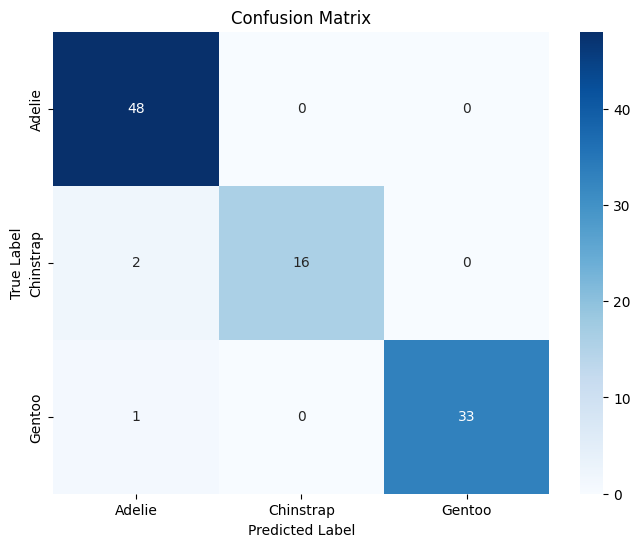

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.94      1.00      0.97        48
   Chinstrap       1.00      0.89      0.94        18
      Gentoo       1.00      0.97      0.99        34

    accuracy                           0.97       100
   macro avg       0.98      0.95      0.97       100
weighted avg       0.97      0.97      0.97       100



In [19]:
from sklearn.metrics import confusion_matrix, classification_report


#uso il modello per fare previsioni sul test set
y_pred_prob = model.predict(X_test)  #questo comando serve per ottenere le probabilità previste per ogni classe
y_pred = np.argmax(y_pred_prob, axis=1)  #in qeesto modo si selezione la classe con probab piu alta per ogni esempio

#uso la confusion Matrix per confrontare le etichette reali con quelle predette
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#richiedo di visualizzare la Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=species_encoder.classes_, yticklabels=species_encoder.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

#stampo il report di classificazione (con le etichette per le diverse specie)
class_names = [str(class_label) for class_label in species_encoder.classes_]
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))



Commento finale ai risultati:

Il modello ha ottenuto un'accuratezza complessiva del 97% sul set di test, con ottime prestazioni su tutte e tre le specie di pinguini:
-La specie "Adelie" ha una precisione del 94% e un recall del 100%, indicando che il modello identifica quasi sempre correttamente questa classe, con pochissimi falsi negativi.
-la specie "Chinstrap" ha una precisione del 100%, ma un recall dell'89%, il che significa che il modello predice sempre correttamente i pinguini Chinstrap quando lo fa, ma ne manca alcuni (falsi negativi).
-l'ultima specie "Gentoo" ha ottenuto una precisione e un recall molto alti, rispettivamente del 100% e del 97%, dimostrando che il modello è molto efficace nel classificare questa specie.
